In [1]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22



#outdir = 'outdir'
#label = 'eccentric'
#bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.
#np.random.seed(150914)

In [2]:
# chosen masses
mass_1 = 6.5
mass_2 = 5.8
chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1
ff = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
tot_m = chirp_mass*(1+mass_ratio)**(6/5)/mass_ratio**(3/5)
print(chirp_mass,mass_ratio)
print(ff)
print(tot_m)

5.34347507377356 0.8923076923076922
357.3995964991056
12.299999999999999


In [3]:
time_of_event = 1126259642.413
post_trigger_duration = 1.0
duration = 16.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 512.

In [4]:
############# my waveform model ################
injection_parameters = dict(
    mass_1=6.5, mass_2=5.8, eccentricity=0.0, luminosity_distance=200.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='OSMFD',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_advancement_of_pariastron,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

05:04 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_advancement_of_pariastron
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
XLAL Error - XLALSimInspiralDecomposeWaveformString (LALSimInspiral.c:6464): Invalid waveform string `OSMFD'.
XLAL Error - XLALGetApproximantFromString (LALSimInspiral.c:6502): Cannot parse approximant from string `OSMFD'.
XLAL Error - XLALGetApproximantFromString (LALSimInspiral.c:6502): Invalid argument


RuntimeError: Invalid argument

In [6]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.05299146999303

In [5]:
############# TaylorF2Eccn waveform model ################
injection_parameters2 = dict(
    mass_1=6.5, mass_2=5.8, eccentricity=0.0, luminosity_distance=200., a_1=0.0, a_2=0.0, theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments2 = dict(waveform_approximant='TaylorF2Ecc',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2Ecc_fd,
    parameters=injection_parameters2, waveform_arguments=waveform_arguments2)

ifos2 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos2.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)

05:05 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2Ecc_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
05:05 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
05:05 bilby INFO    : Injected signal in H1:
05:05 bilby INFO    :   optimal SNR = 31.91
05:05 bilby INFO    :   matched filter SNR = 31.02+1.14j
05:05 bilby INFO    :   mass_1 = 6.5
05:05 bilby INFO    :   mass_2 = 5.8
05:05 bilby INFO    :   eccentricity = 0.0
05:05 bilby INFO    :   luminosity_distance = 200.0
05:05 bilby INFO    :   a_1 = 0.0
05:05 bilby INFO    :   a_2 = 0.0
05:05 bilby INFO    :   theta_jn = 0.4
05:05 bilby INFO    :   psi = 2.659
05:05 bilby INFO    :   phase = 1.3
05:05 bilby INFO    :   geocent_time = 1126259642.413
05:05 bilby INFO    :   ra = 1.375
05:05 bilby INFO    :   dec = -1.2108
05:05 bilby INFO    : Generation of spin parameters 

[{'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         3.86205199e-27-2.26118416e-24j, 6.87123197e-27-2.26053281e-24j,
         9.87268599e-27-2.25987783e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.25356101e-24-3.84903182e-27j, -2.25291186e-24-6.84806693e-27j,
         -2.25225909e-24-9.83940214e-27j])},
 {'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         3.86205199e-27-2.26118416e-24j, 6.87123197e-27-2.26053281e-24j,
         9.87268599e-27-2.25987783e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.25356101e-24-3.84903182e-27j, -2.25291186e-24-6.84806693e-27j,
         -2.25225909e-24-9.83940214e-27j])}]

In [6]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos2]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.05299146999306

In [7]:
############# TaylorF2 waveform model ################
injection_parameters3 = dict(
    mass_1=6.5, mass_2=5.8, a_1=0.0, a_2=0.0, luminosity_distance=200., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments3 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator3 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2_fd,
    parameters=injection_parameters3, waveform_arguments=waveform_arguments3)

ifos3 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos3.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters3)

05:05 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
05:05 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
05:05 bilby INFO    : Injected signal in H1:
05:05 bilby INFO    :   optimal SNR = 31.91
05:05 bilby INFO    :   matched filter SNR = 31.16-0.68j
05:05 bilby INFO    :   mass_1 = 6.5
05:05 bilby INFO    :   mass_2 = 5.8
05:05 bilby INFO    :   a_1 = 0.0
05:05 bilby INFO    :   a_2 = 0.0
05:05 bilby INFO    :   luminosity_distance = 200.0
05:05 bilby INFO    :   theta_jn = 0.4
05:05 bilby INFO    :   psi = 2.659
05:05 bilby INFO    :   phase = 1.3
05:05 bilby INFO    :   geocent_time = 1126259642.413
05:05 bilby INFO    :   ra = 1.375
05:05 bilby INFO    :   dec = -1.2108
05:05 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
05:05 bilby INFO

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -4.32003849e-26-2.26077474e-24j, -3.49600749e-26-2.26027291e-24j,
         -2.67304192e-26-2.25974131e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.25315298e-24+4.30547432e-26j, -2.25265283e-24+3.48422138e-26j,
         -2.25212302e-24+2.66403027e-26j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -4.32003849e-26-2.26077474e-24j, -3.49600749e-26-2.26027291e-24j,
         -2.67304192e-26-2.25974131e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.25315298e-24+4.30547432e-26j, -2.25265283e-24+3.48422138e-26j,
         -2.25212302e-24+2.66403027e-26j])}]

In [8]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos3]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.05299146999306

05:05 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
05:05 bilby INFO    : Injected signal in H1:
05:05 bilby INFO    :   optimal SNR = 31.91
05:05 bilby INFO    :   matched filter SNR = 64.44+1.35j
05:05 bilby INFO    :   mass_1 = 6.5
05:05 bilby INFO    :   mass_2 = 5.8
05:05 bilby INFO    :   eccentricity = 0.0
05:05 bilby INFO    :   luminosity_distance = 200.0
05:05 bilby INFO    :   theta_jn = 0.4
05:05 bilby INFO    :   psi = 2.659
05:05 bilby INFO    :   phase = 1.3
05:05 bilby INFO    :   geocent_time = 1126259642.413
05:05 bilby INFO    :   ra = 1.375
05:05 bilby INFO    :   dec = -1.2108
05:05 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
05:05 bilby INFO    : Injected signal in L1:
05:05 bilby INFO    :   optimal SNR = 25.83
05:05 bilby INFO    :   matched filter SNR = 53.20-0.25j
05:05 bilby INFO    :   mass_1 = 6.5
05:05 bilby INFO    :   mass_2 = 5.8
05:05 bilby INFO    :   eccentricity = 0.0
05:05 bilby INFO    

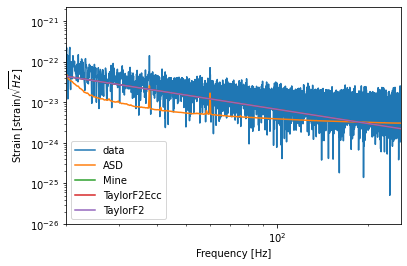

In [11]:
#to plot the frequency domain  
############# my waveform model ################
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]
idxs = H1.strain_data.frequency_mask  

############# TaylorF2Eccn waveform model ################
injection2 = ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)
H12 = ifos2[0]
H1_injection2 = injection2[0]
idxs2 = H12.strain_data.frequency_mask

############# TaylorF2 waveform model ################
injection3 = ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters2)
H13 = ifos3[0]
H1_injection3 = injection3[0]
idxs3 = H13.strain_data.frequency_mask

############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2Eccn waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(20.,256.)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

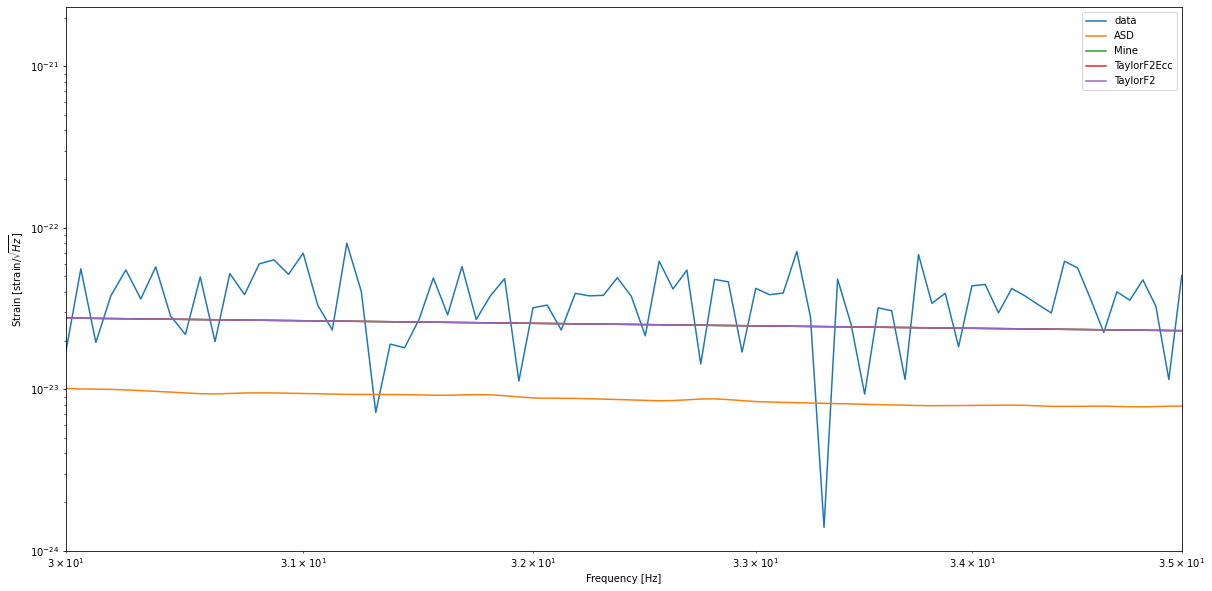

In [12]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2Eccn waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(30.,35.)
ax.set_ylim(1e-24,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

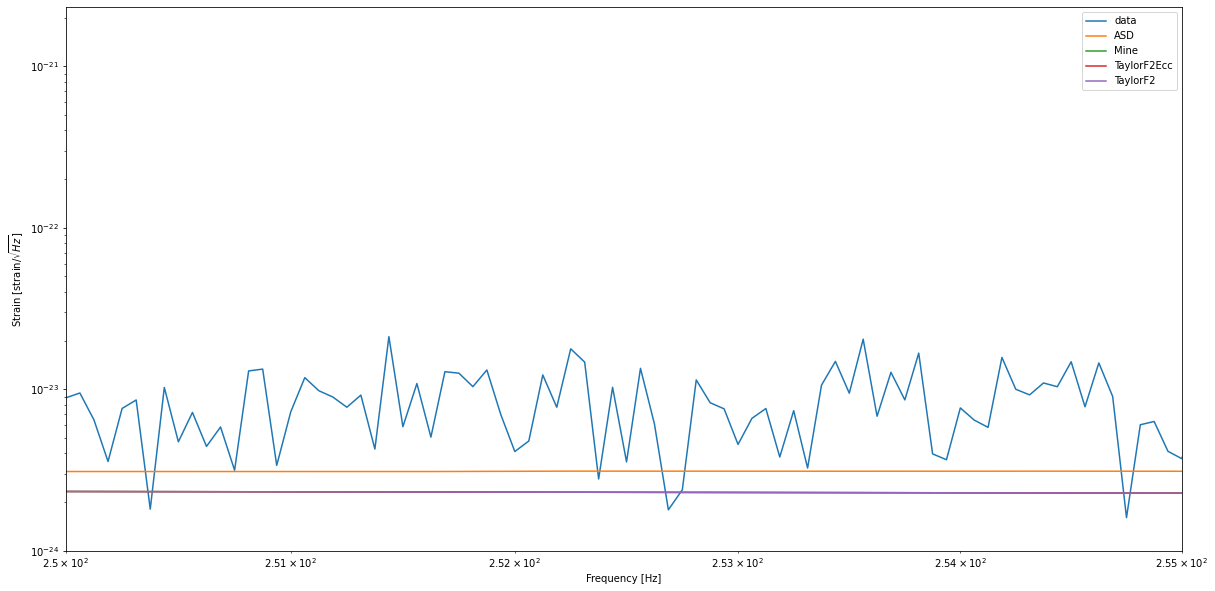

In [13]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2Eccn waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(250.,255.)
ax.set_ylim(1e-24,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [38]:
# check for abs value of h_plus values
# my waveform model
arg_plus = dict(frequency_array=np.array([20.,30.,40.,50., 60., 70., 80., 90., 100.]),
    mass_1=6.5, mass_2=5.8, eccentricity=0.0, luminosity_distance=200.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

np.abs(bilby.gw.source.lal_eccentric_advancement_of_pariastron(**arg_plus)['plus'])

array([0.00000000e+00, 9.93197763e-23, 4.42419307e-23, 2.75673023e-23,
       1.97075397e-23, 1.51904531e-23, 1.22798371e-23, 1.02585982e-23,
       8.77871091e-24])

In [14]:
# TaylorF2Ecc
arg_plus2 = dict(frequency_array=np.array([20.,30.,40.,50., 60., 70., 80., 90., 100.]),
    mass_1=6.5, mass_2=5.8, eccentricity=0.0, luminosity_distance=200., a_1=0.0, a_2=0.0, theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

np.abs(bilby.gw.source.lal_taylorF2Ecc_fd(**arg_plus2)['plus'])

array([0.00000000e+00, 9.93197763e-23, 4.42419307e-23, 2.75673023e-23,
       1.97075397e-23, 1.51904531e-23, 1.22798371e-23, 1.02585982e-23,
       8.77871091e-24])

In [15]:
# TaylorF2Ecc
arg_plus2 = dict(frequency_array=np.array([20.,30.,40.,50., 60., 70., 80., 90., 100.]),
    mass_1=6.5, mass_2=5.8, luminosity_distance=200., a_1=0.0, a_2=0.0, theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

np.abs(bilby.gw.source.lal_taylorF2_fd(**arg_plus2)['plus'])

array([0.00000000e+00, 9.93197763e-23, 4.42419307e-23, 2.75673023e-23,
       1.97075397e-23, 1.51904531e-23, 1.22798371e-23, 1.02585982e-23,
       8.77871091e-24])

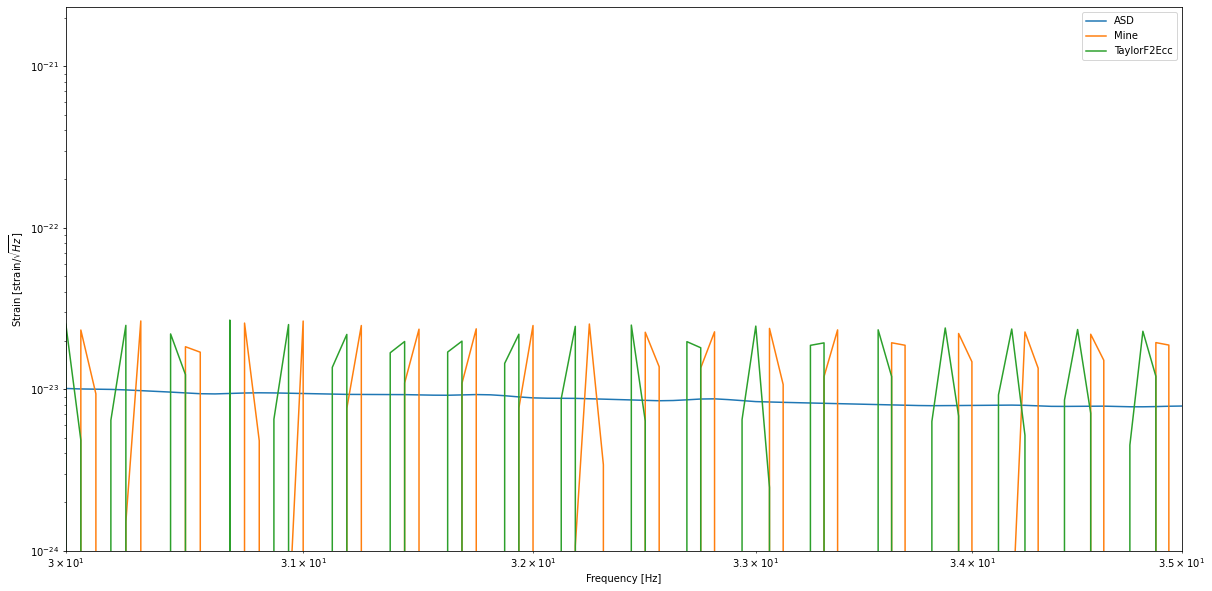

In [13]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2Eccn waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
'''ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2")'''

#############################
ax.set_xlim(30.,35.)
ax.set_ylim(1e-24,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

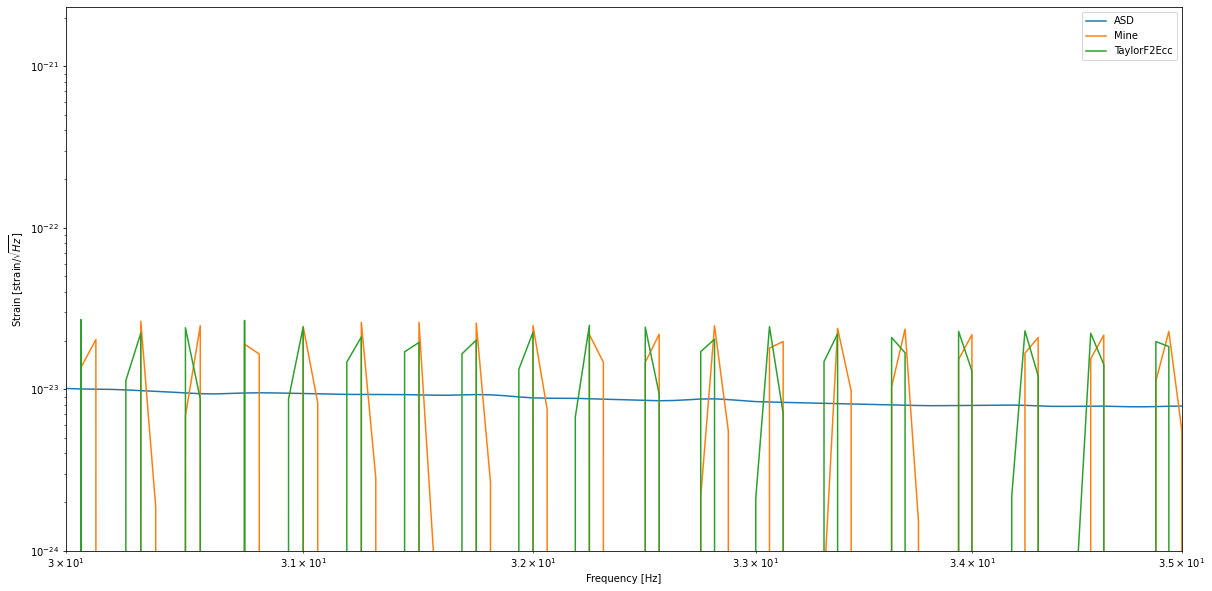

In [14]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["cross"][idxs]),
          label="Mine")

############# TaylorF2Eccn waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["cross"][idxs2]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
'''ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2")'''

#############################
ax.set_xlim(30.,35.)
ax.set_ylim(1e-24,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

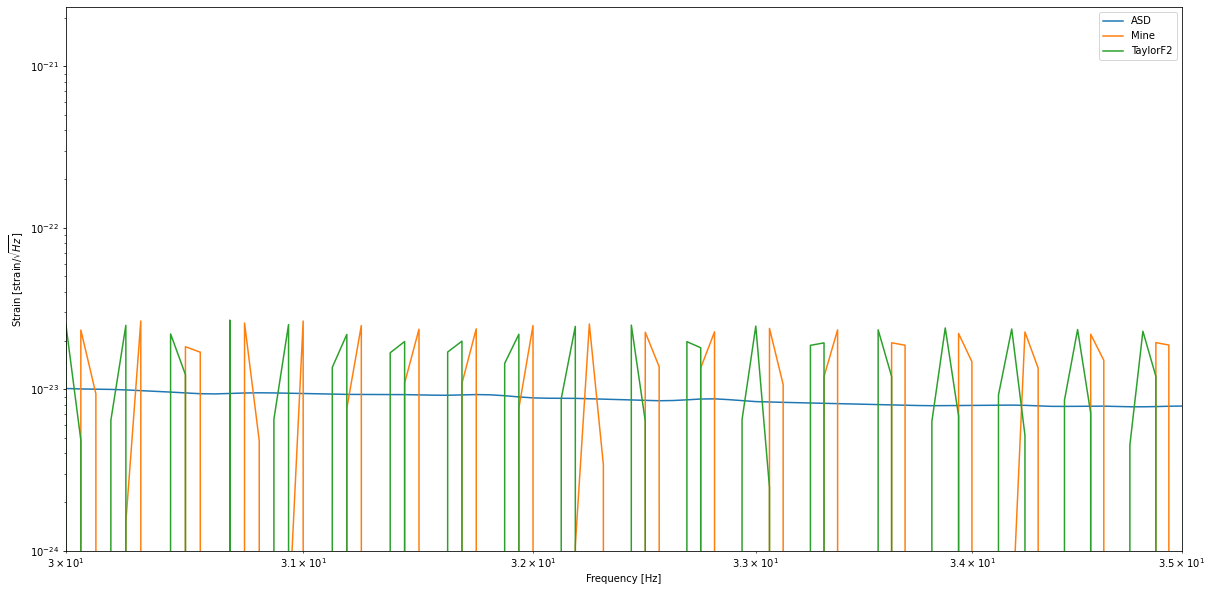

In [14]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(30.,35.)
ax.set_ylim(1e-24,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

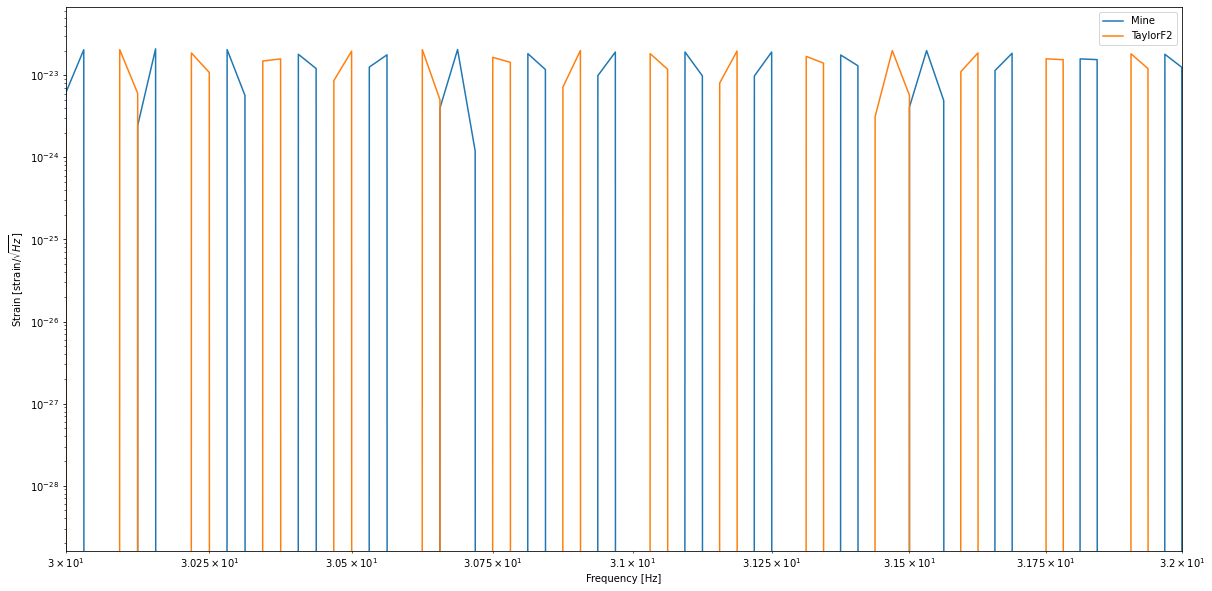

In [ ]:
############# my waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")'''
ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2Eccn waveform model ################
'''ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2Ecc")'''

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(30.,35.)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

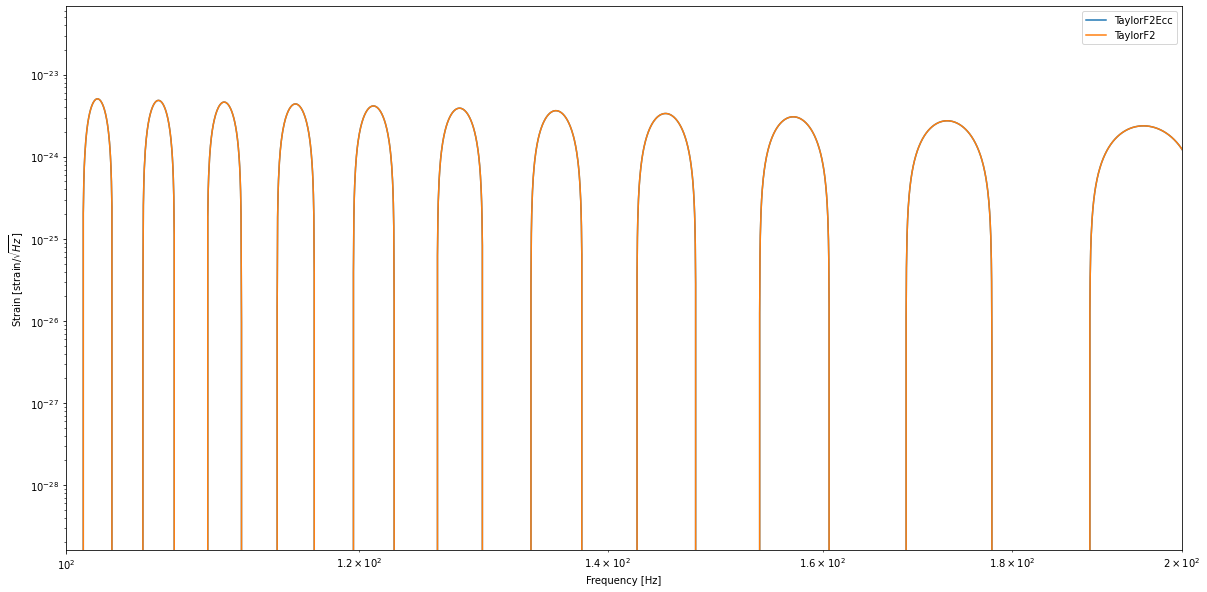

In [ ]:
############# my waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")'''
ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2Eccn waveform model ################
'''ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2Ecc")'''

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(100.,200.)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()a

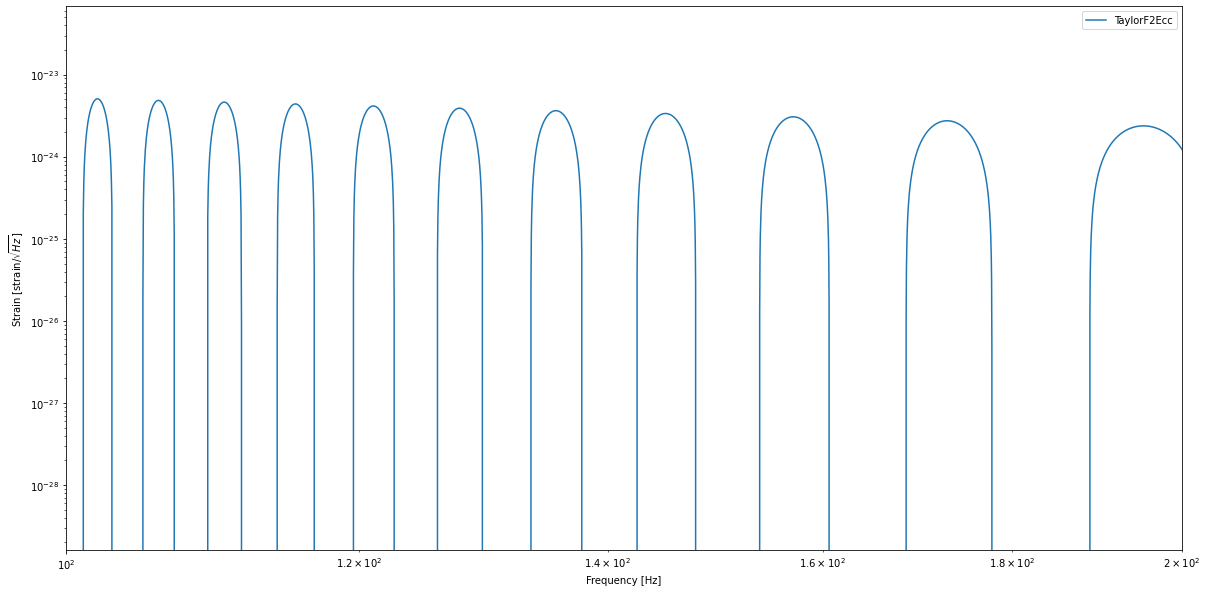